### Beginning of Deep Learning
#### Perceptron XOR Problem


퍼셉트론은 초기에는 단층 구조로 제안되었으며 비선형문제에 한계를 가지고 있었고 XOR 문제는 퍼셉트론이 잘 해결하지 못하는 비선형 분류 문제 중 하나로 알려져 있다.

XOR은 배타적 논리합을 의미하며, 두 개의 입력이 다를 때 1을 출력하고, 같을 때 0을 출력하는 논리 연산을 말한다.


In [1]:
import numpy as np

In [2]:
X = np.array([
    [0,0],
    [1,0],
    [0,1],
    [1,1]
])

y = np.array([
    [0],
    [1],
    [1],
    [0]
])

#### MLP 모델 생성

**다층 퍼셉트론(multi-layer perceptron)**이 등장하여 비선형 분류 문제를 해결할 수 있게 됐다.

다층 퍼셉트론은 입력층(input layer), **은닉층(hidden layer)**, 출력층(output layer)으로 구성되며 **은닉층**은 단일 퍼셉트론과 달리 여러 개의 노드로 구성되고 비선형성을 추가하는 역할을 한다.

In [4]:
import tensorflow as tf

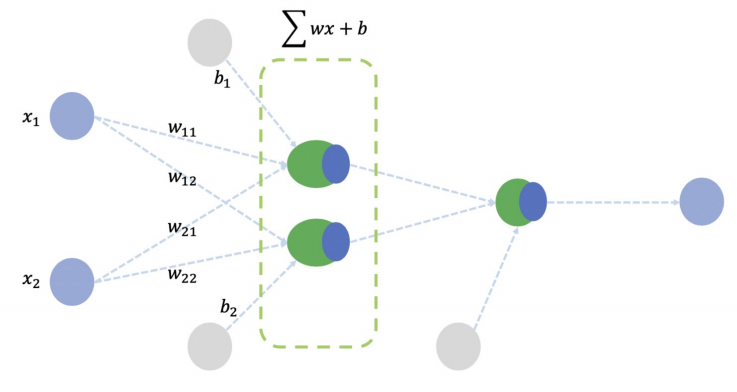

In [5]:
# 첫 번째 레이어는 입력층과 은닉층 역할
# 두 번째 레이어는 출력층 역할
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='sigmoid', input_shape=(2,)), # 입력 데이터 2개 , 출력 데이터 2개
    tf.keras.layers.Dense(1, activation='sigmoid') # input_shape=(2,) 생략 ->  앞의 레이어 층의 출력 데이터 형태와 동일
])

In [6]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mse')

In [7]:
hist = model.fit(X, y, epochs=5000, # epochs : 지정한 횟수만큼 학습
                 batch_size=1) # batch_size : 한번에 학습하는 데이터의 수를 지정

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
4/4 [==============================] - 0s 4ms/step - loss: 0.2325
Epoch 2502/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2323
Epoch 2503/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2323
Epoch 2504/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2323
Epoch 2505/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2322
Epoch 2506/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2321
Epoch 2507/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2321
Epoch 2508/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2320
Epoch 2509/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2319
Epoch 2510/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2318
Epoch 2511/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2318
Epoch 2512/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2

In [8]:
model.predict(X)

1/1 [==============================] - 0s 77ms/step


array([[0.0930924 ],
       [0.9271625 ],
       [0.9132939 ],
       [0.08152722]], dtype=float32)

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

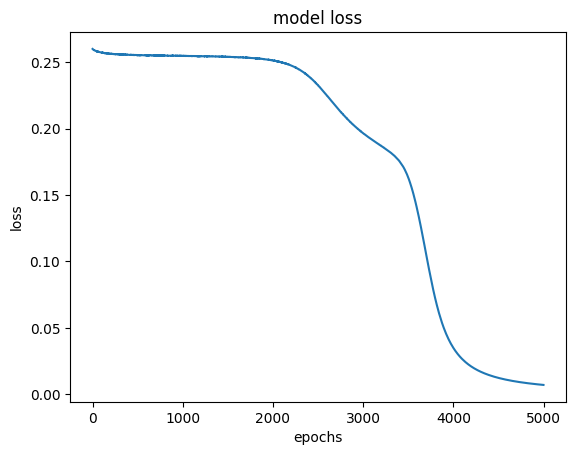

In [10]:
plt.plot(hist.history['loss']);
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

#### layer weight

In [ ]:
for w in model.weights:
    print('-----------------------------------------------------')
    print(w)